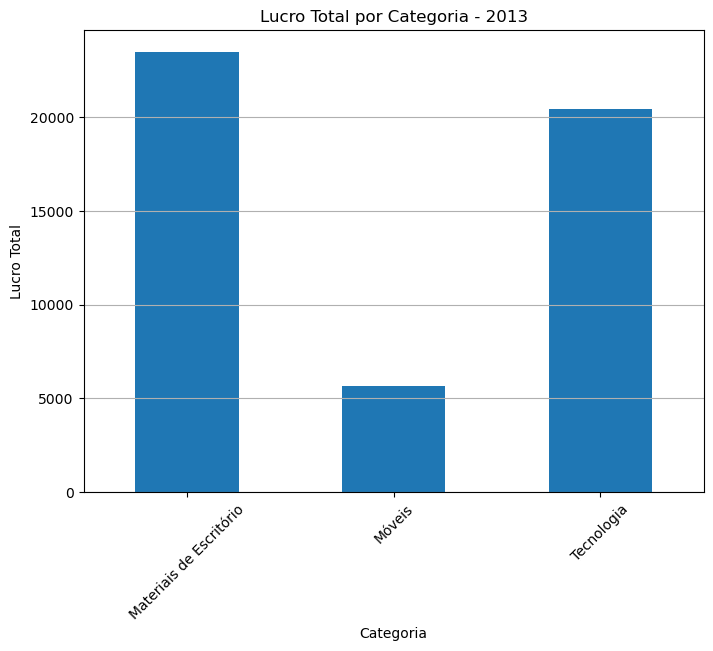

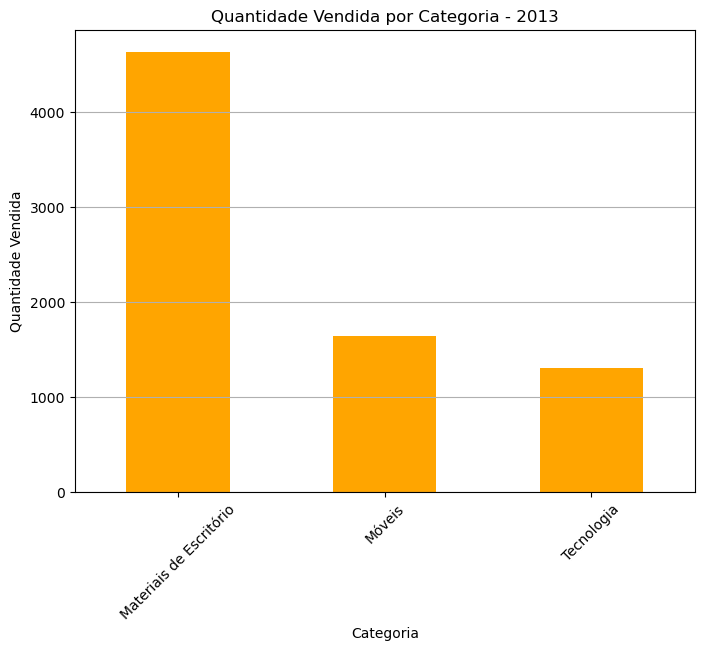

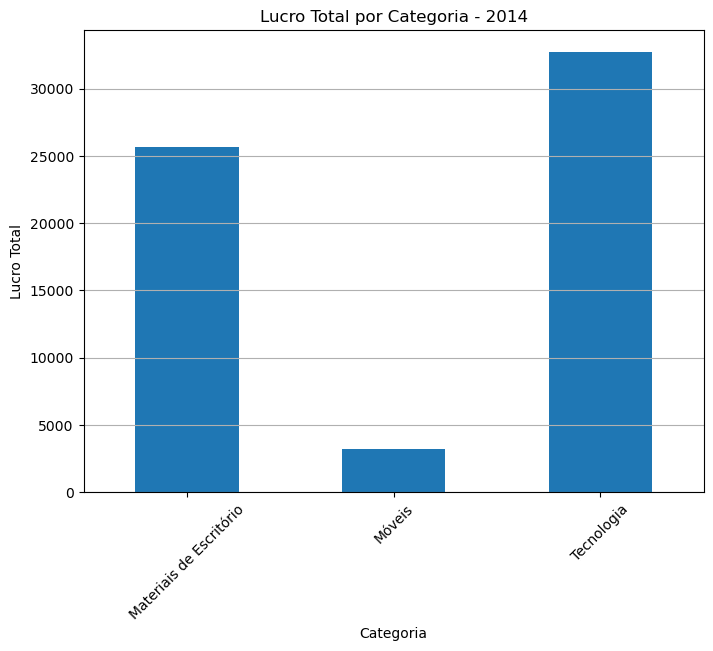

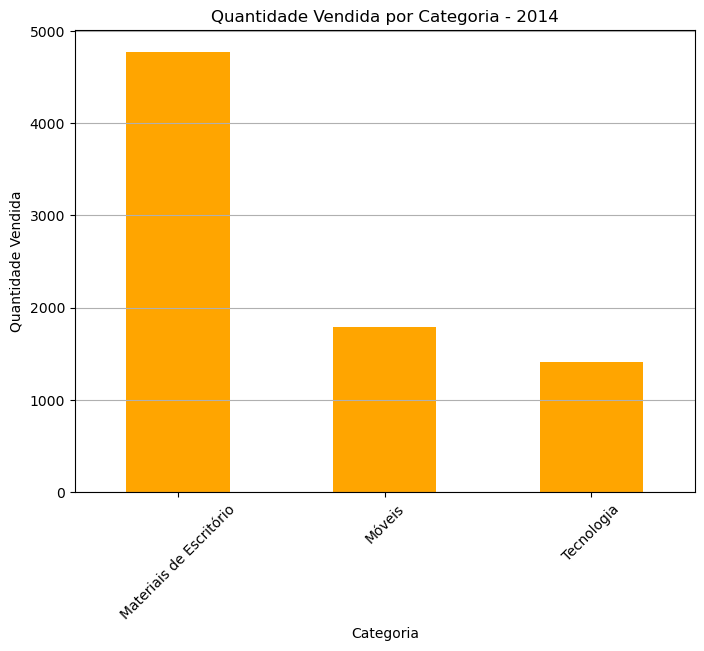

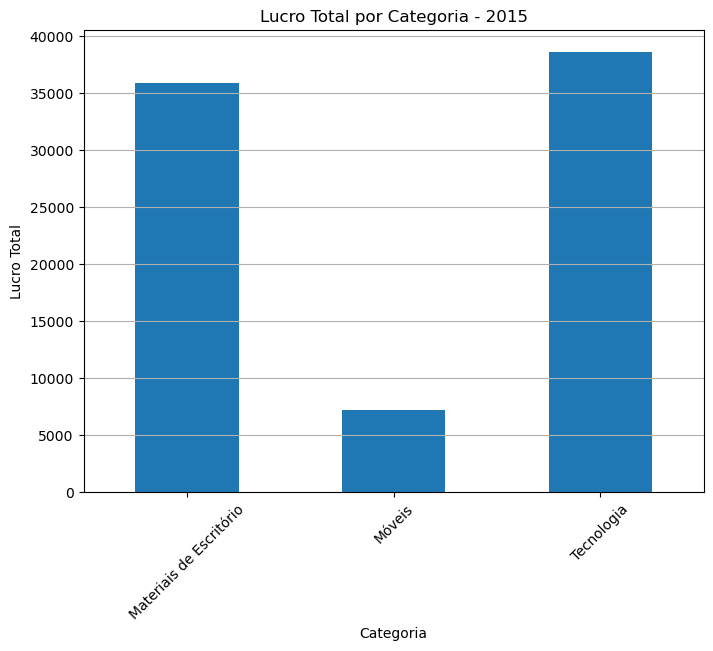

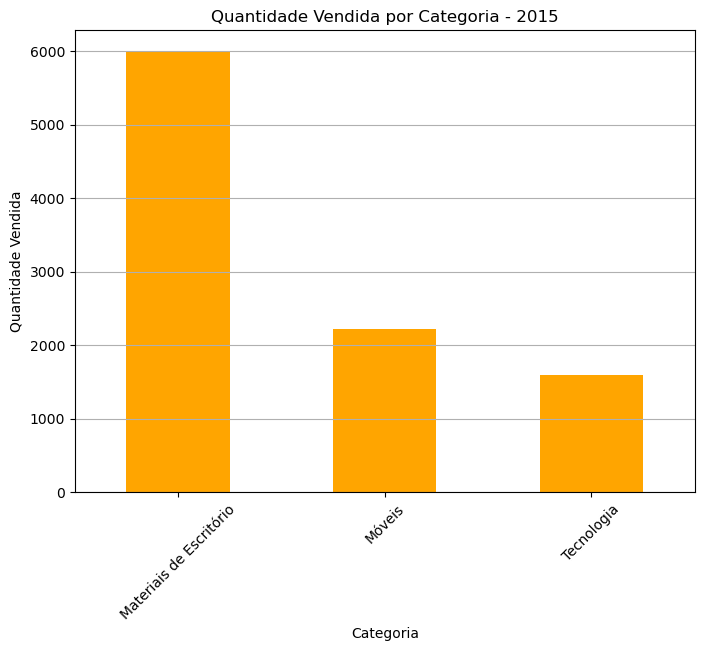

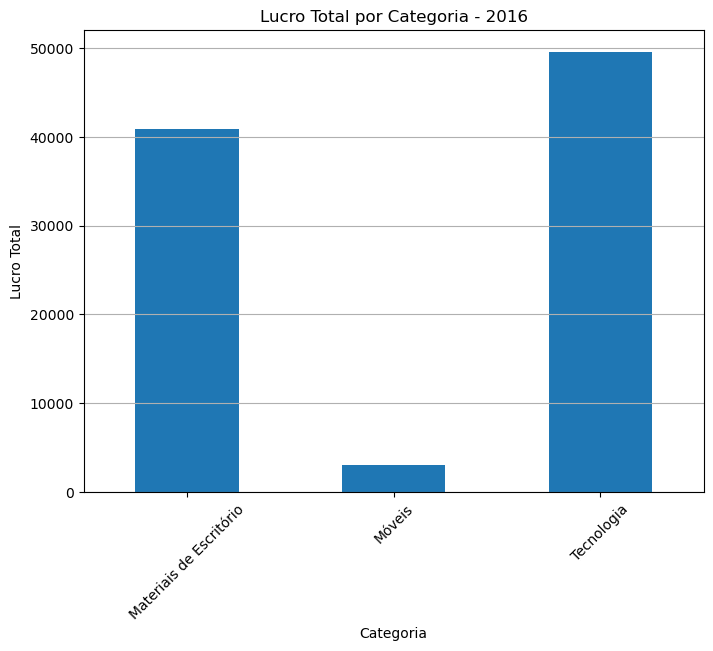

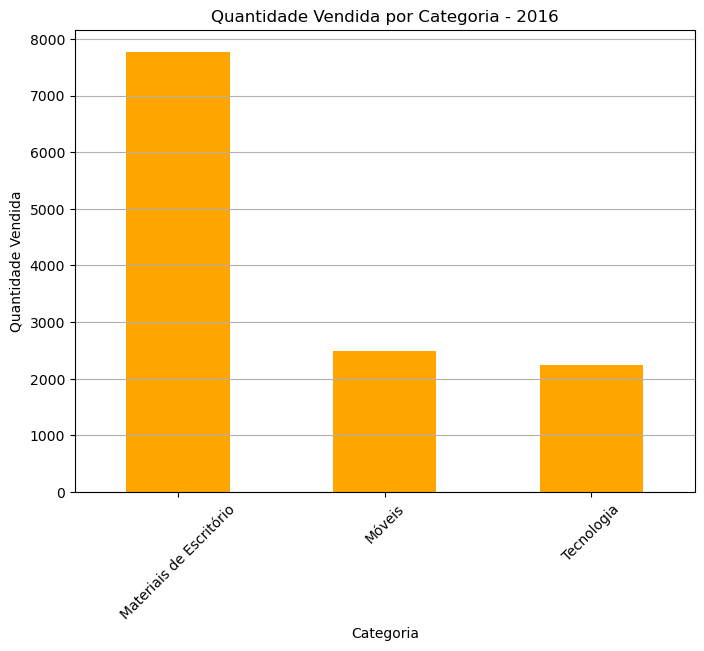

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho do arquivo e os anos das planilhas
file_path = "dados_amr.xlsx"  # Altere se necessário
anos = [2013, 2014, 2015, 2016]

# Loop para gerar gráficos para cada ano
for ano in anos:
    # Carregar a planilha do ano específico
    df = pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}')
    
    # Agrupar por categoria e calcular a soma do lucro e da quantidade
    resumo = df.groupby('categoria').agg({'lucro': 'sum', 'quantidade': 'sum'})
    
    # Gráfico de barras para o lucro
    plt.figure(figsize=(8, 6))
    resumo['lucro'].plot(kind='bar')
    plt.title(f'Lucro Total por Categoria - {ano}')
    plt.ylabel('Lucro Total')
    plt.xlabel('Categoria')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    
    # Gráfico de barras para a quantidade
    plt.figure(figsize=(8, 6))
    resumo['quantidade'].plot(kind='bar', color='orange')
    plt.title(f'Quantidade Vendida por Categoria - {ano}')
    plt.ylabel('Quantidade Vendida')
    plt.xlabel('Categoria')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


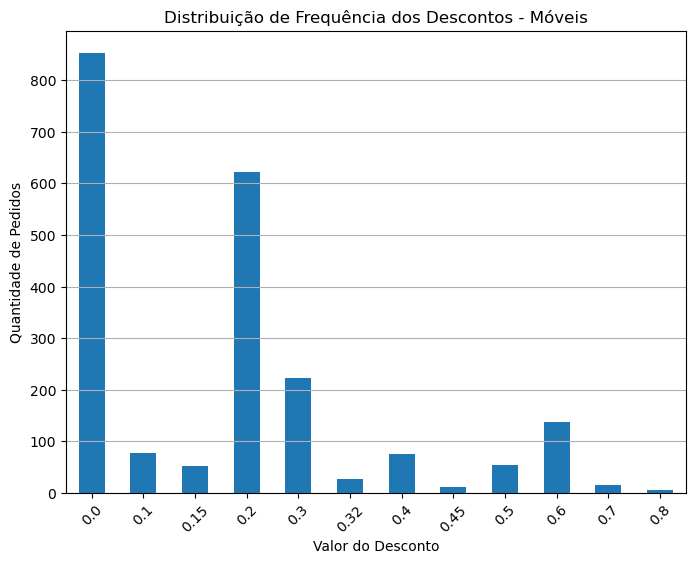

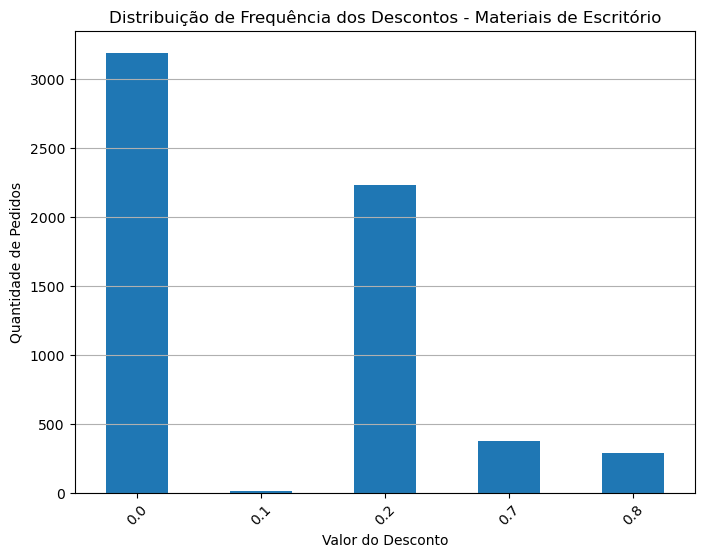

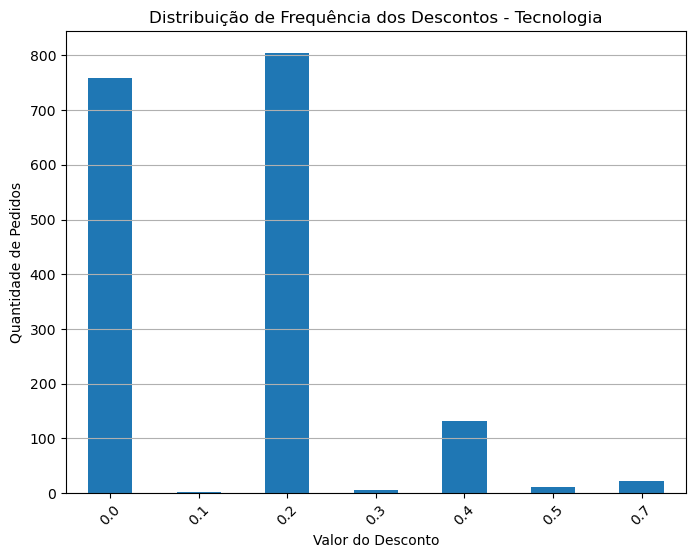

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "dados_amr.xlsx"
anos = [2013, 2014, 2015, 2016]

# Carregar todos os anos em um único DataFrame
df_list = [pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}') for ano in anos]
df_all = pd.concat(df_list)

# Pegar todas as categorias únicas
categorias = df_all['categoria'].unique()

# Gerar gráfico para cada categoria
for categoria in categorias:
    df_categoria = df_all[df_all['categoria'] == categoria]
    contagem_descontos = df_categoria['desconto'].value_counts().sort_index()
    
    plt.figure(figsize=(8, 6))
    contagem_descontos.plot(kind='bar')
    plt.title(f'Distribuição de Frequência dos Descontos - {categoria}')
    plt.xlabel('Valor do Desconto')
    plt.ylabel('Quantidade de Pedidos')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


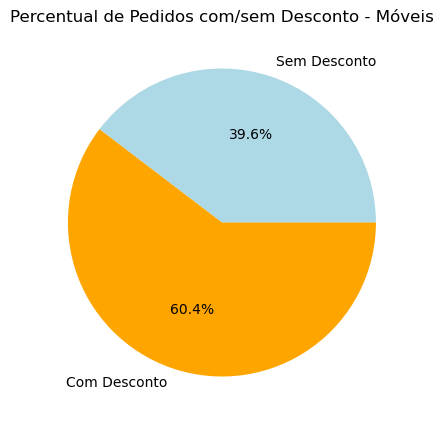

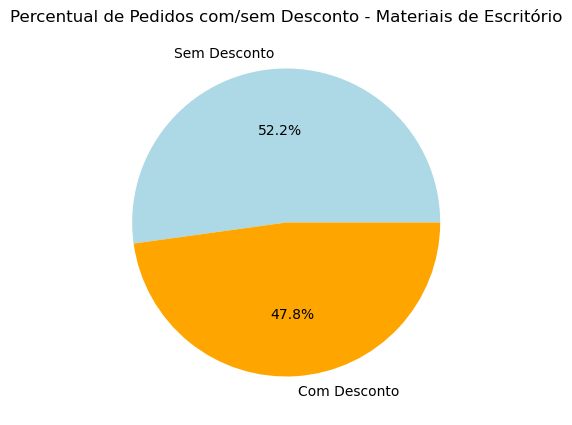

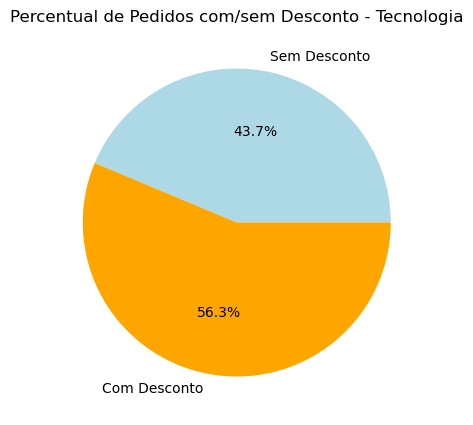

In [18]:
for categoria in categorias:
    df_categoria = df_all[df_all['categoria'] == categoria]
    total_pedidos = len(df_categoria)
    pedidos_com_desconto = len(df_categoria[df_categoria['desconto'] > 0])
    pedidos_sem_desconto = total_pedidos - pedidos_com_desconto

    plt.figure(figsize=(5, 5))
    plt.pie([pedidos_sem_desconto, pedidos_com_desconto], 
            labels=['Sem Desconto', 'Com Desconto'], 
            autopct='%1.1f%%', colors=['lightblue', 'orange'])
    plt.title(f'Percentual de Pedidos com/sem Desconto - {categoria}')
    plt.show()


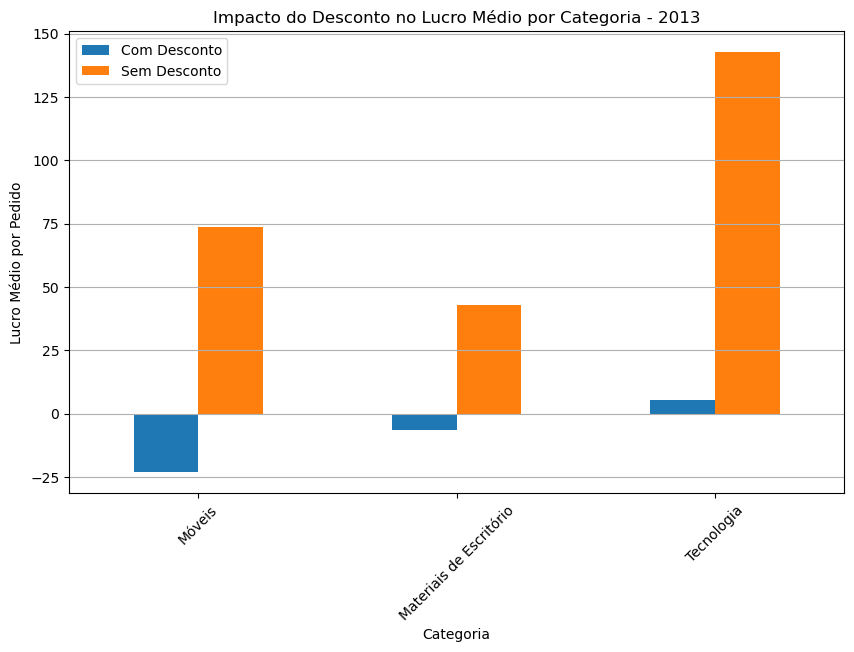

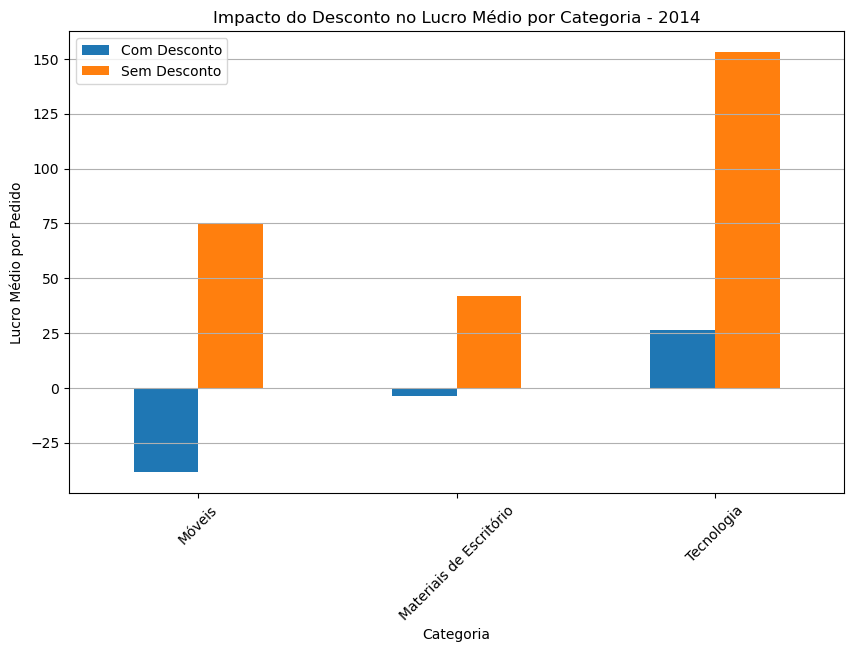

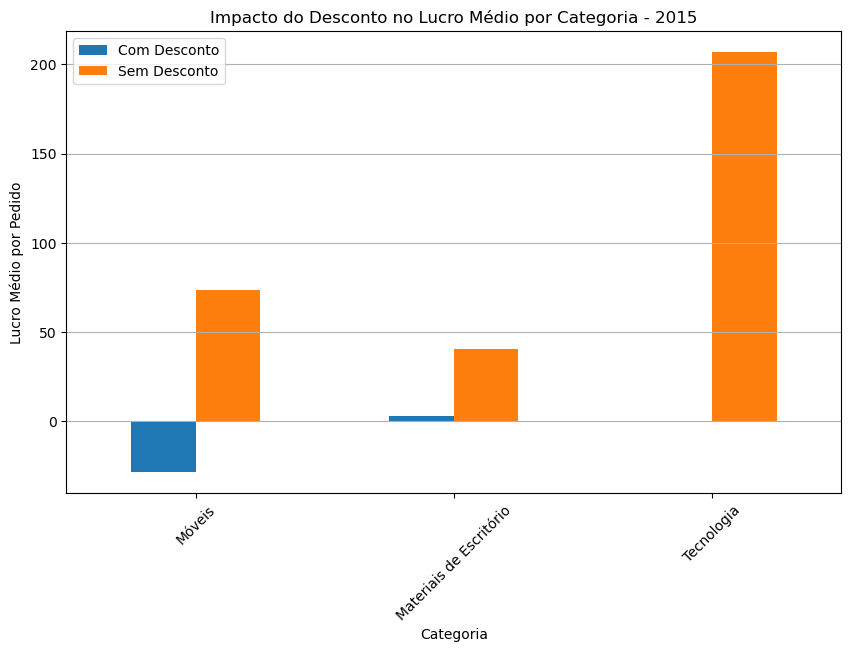

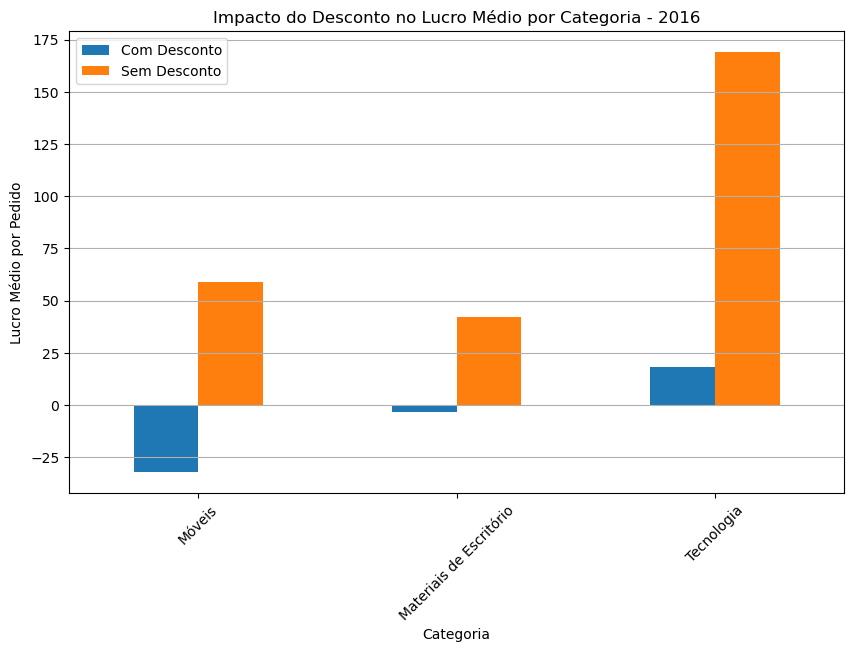

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho do arquivo
file_path = "dados_amr.xlsx"  # certifique-se que este arquivo está no mesmo diretório
anos = [2013, 2014, 2015, 2016]

# Processar cada ano individualmente
for ano in anos:
    df = pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}')

    resultados = []

    for categoria in df['categoria'].unique():
        df_categoria = df[df['categoria'] == categoria]

        # Filtrar pedidos com e sem desconto
        com_desc = df_categoria[df_categoria['desconto'] > 0]
        sem_desc = df_categoria[df_categoria['desconto'] == 0]

        # Calcular lucro médio
        lucro_medio_com = com_desc['lucro'].mean() if not com_desc.empty else 0
        lucro_medio_sem = sem_desc['lucro'].mean() if not sem_desc.empty else 0

        resultados.append({
            'Categoria': categoria,
            'Com Desconto': lucro_medio_com,
            'Sem Desconto': lucro_medio_sem
        })

    # Converter em DataFrame
    df_resultados = pd.DataFrame(resultados).set_index('Categoria')

    # Plotar gráfico de barras agrupadas
    df_resultados.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Impacto do Desconto no Lucro Médio por Categoria - {ano}')
    plt.ylabel('Lucro Médio por Pedido')
    plt.xlabel('Categoria')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()



Ano: 2013 - Top 3 regiões que mais compraram: Sudeste, Nordeste, Sul


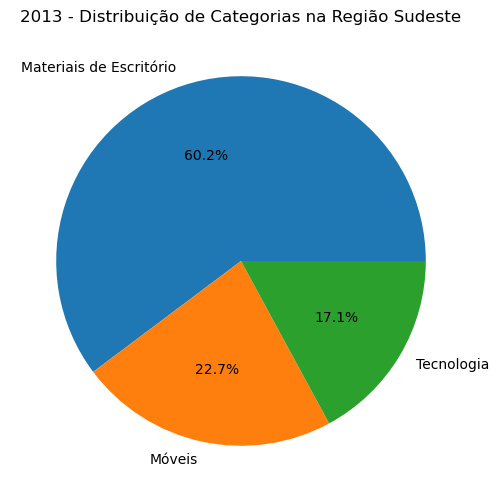

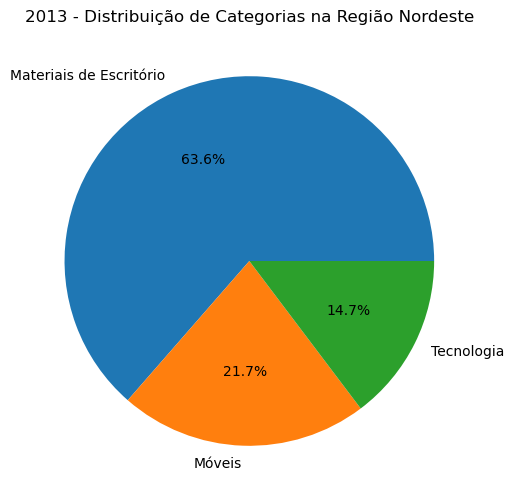

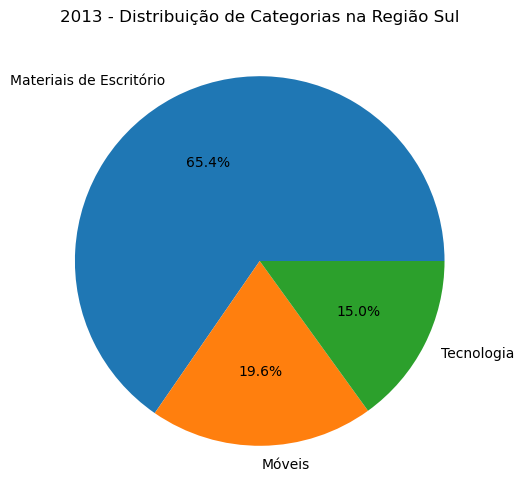


Ano: 2014 - Top 3 regiões que mais compraram: Sudeste, Nordeste, Sul


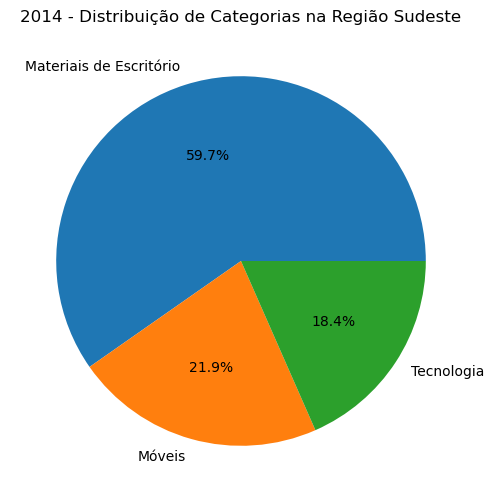

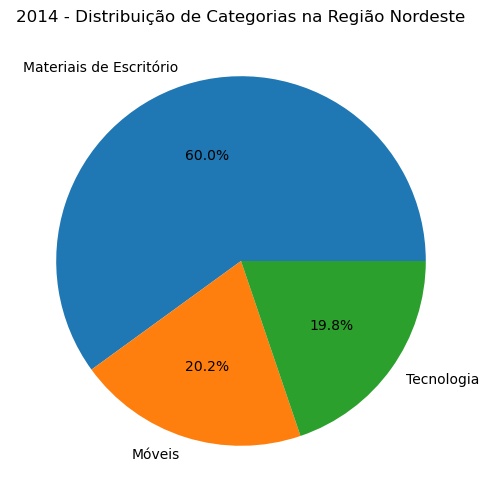

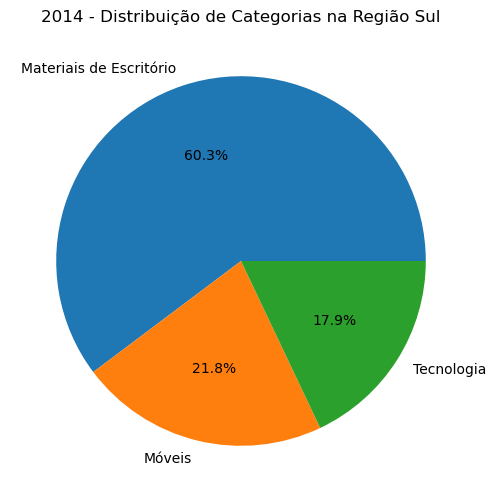


Ano: 2015 - Top 3 regiões que mais compraram: Sudeste, Nordeste, Sul


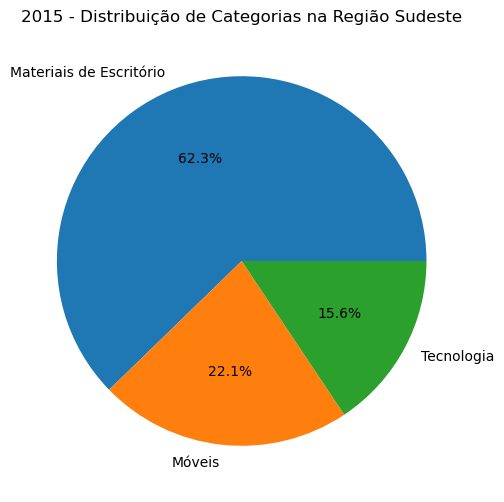

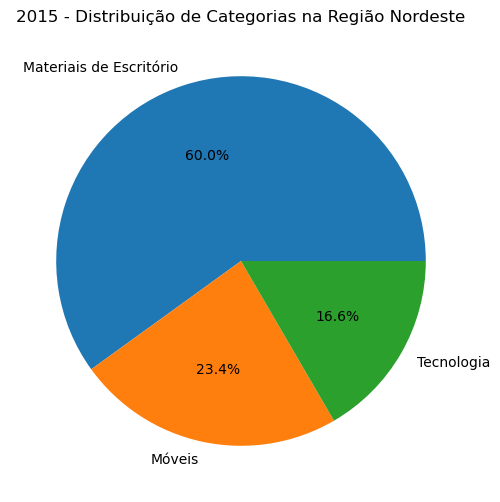

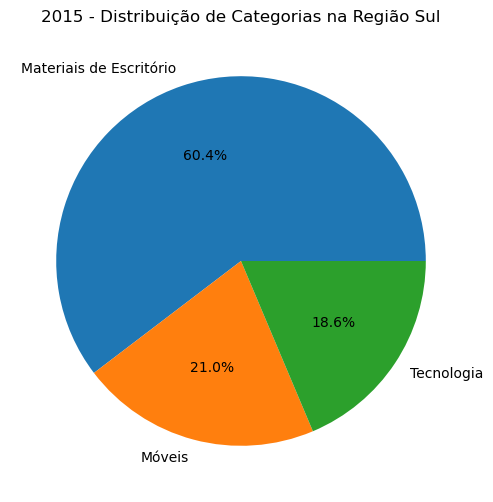


Ano: 2016 - Top 3 regiões que mais compraram: Sudeste, Nordeste, Sul


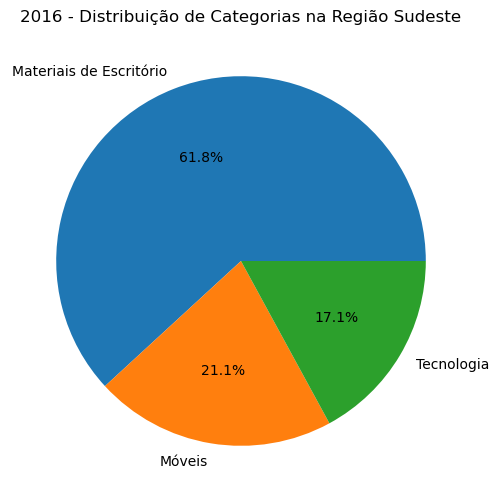

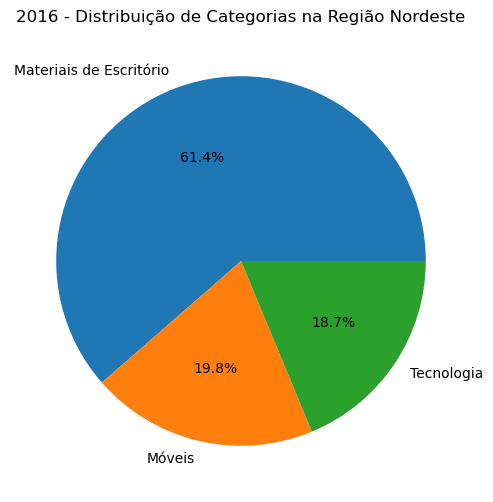

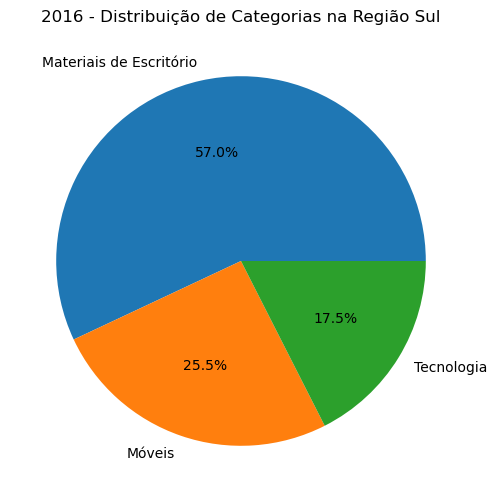

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Defina o caminho para o seu arquivo
file_path = "dados_amr.xlsx"
anos = [2013, 2014, 2015, 2016]

for ano in anos:
    df = pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}')
    
    # Conta a quantidade total de pedidos por região
    top_regioes = df['região'].value_counts().head(3).index.tolist()
    
    print(f"\nAno: {ano} - Top 3 regiões que mais compraram: {', '.join(top_regioes)}")
    
    # Processar cada uma das top 3 regiões
    for regiao in top_regioes:
        df_regiao = df[df['região'] == regiao]
        
        # Contar a quantidade por categoria na região
        contagem_categorias = df_regiao['categoria'].value_counts(normalize=True) * 100
        
        # Exibir os dados em gráfico de pizza
        plt.figure(figsize=(6, 6))
        contagem_categorias.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'{ano} - Distribuição de Categorias na Região {regiao}')
        plt.ylabel('')
        plt.show()


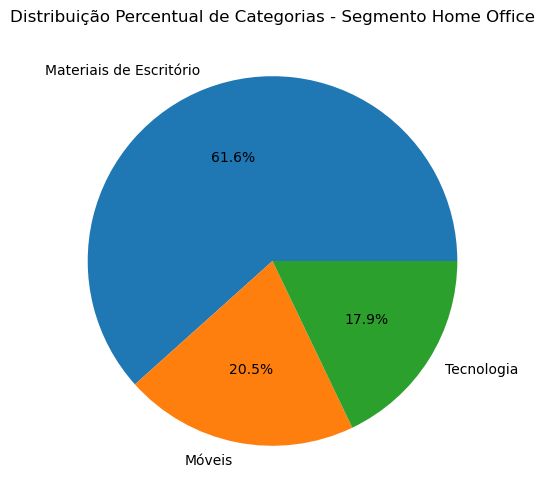

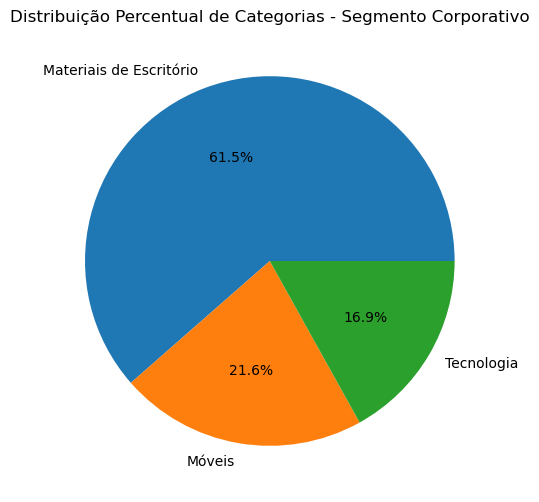

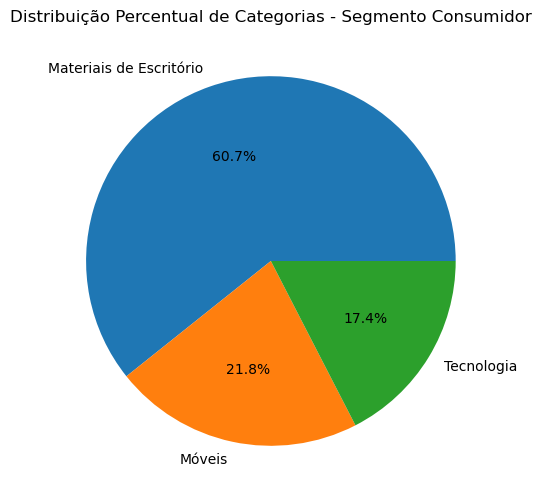

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho e carregar todos os anos juntos
file_path = "dados_amr.xlsx"
anos = [2013, 2014, 2015, 2016]

# Juntar todas as planilhas
df_list = [pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}') for ano in anos]
df_all = pd.concat(df_list)

# Listar os segmentos únicos
segmentos = df_all['segmento'].unique()

# Gerar um gráfico de pizza para cada segmento
for segmento in segmentos:
    df_segmento = df_all[df_all['segmento'] == segmento]
    contagem_categorias = df_segmento['categoria'].value_counts(normalize=True) * 100

    plt.figure(figsize=(6, 6))
    contagem_categorias.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribuição Percentual de Categorias - Segmento {segmento}')
    plt.ylabel('')
    plt.show()


O ano com maior volume de vendas é 2016 com 12503 itens vendidos.


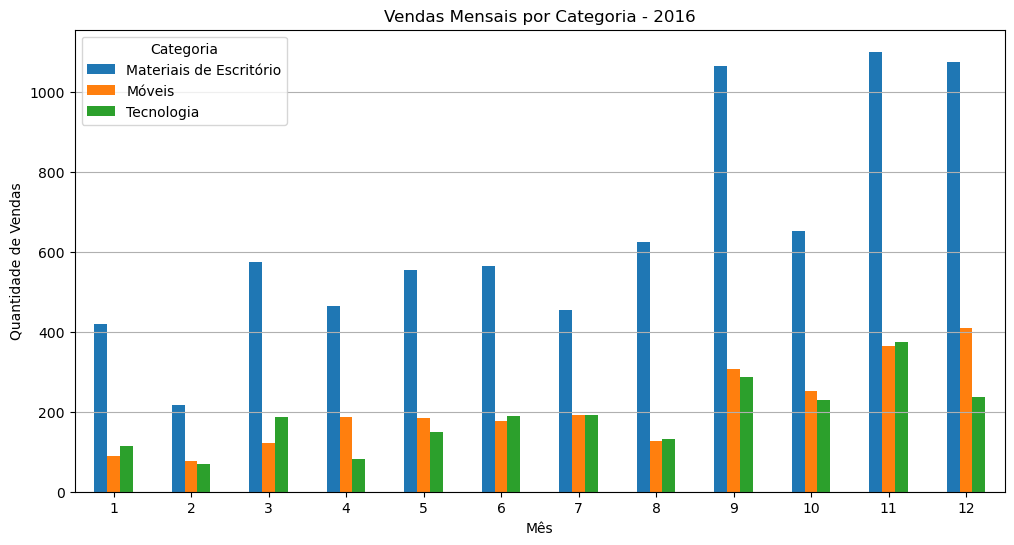

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo e lista de anos
file_path = "dados_amr.xlsx"
anos = [2013, 2014, 2015, 2016]

# Variáveis para guardar o ano com maior volume
maior_volume = 0
ano_maior_volume = None
df_maior_volume = None

# Determinar o ano com maior quantidade de vendas
for ano in anos:
    df = pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}')
    volume_total = df['quantidade'].sum()
    if volume_total > maior_volume:
        maior_volume = volume_total
        ano_maior_volume = ano
        df_maior_volume = df

print(f"O ano com maior volume de vendas é {ano_maior_volume} com {maior_volume} itens vendidos.")

# Processar vendas mensais por categoria para o ano de maior volume
df_maior_volume['mes'] = pd.to_datetime(df_maior_volume['data_pedido']).dt.month
resumo_mensal_categoria = df_maior_volume.groupby(['mes', 'categoria'])['quantidade'].sum().unstack()

# Plotar gráfico de barras agrupadas
resumo_mensal_categoria.plot(kind='bar', figsize=(12, 6))
plt.title(f'Vendas Mensais por Categoria - {ano_maior_volume}')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Categoria')
plt.grid(axis='y')
plt.show()
